In [1]:

import pandas as pd

# Đường dẫn đến tệp CSV
file_path = 'D:\dulieuxettuyendaihoc.csv'

# Đọc tệp CSV vào DataFrame
df = pd.read_csv(file_path)

# Hiển thị một số dòng đầu của DataFrame
df.head()

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No


In [4]:
mean=df['T1'].mean()
print(mean)

5.946000000000001


In [17]:
import numpy as np
print("NGÔN NGỮ")
#range
ranges=df['NGONNGU'].max()-df['NGONNGU'].min()
print("Range=max-min:",ranges)
#IQR
iqr=df['NGONNGU'].quantile(0.75)-df['NGONNGU'].quantile(0.25)
print("IQR=Q3-Q1:",iqr)
#Độ lệch trung bình
average=np.mean(np.abs(df['NGONNGU']-np.mean(df['NGONNGU'])))
print("Độ lệch trung bình:",average)

NGÔN NGỮ
Range: 6.0
IQR: 2.25
Độ lệch trung bình: 1.1600000000000001


In [2]:
print(df['NGONNGU'].min(),"\n")
print(df['NGONNGU'].max(),"\n")
print(df['NGONNGU'].mean(),"\n")
#trung vị
print(df['NGONNGU'].median(),"\n")
#yếu vị lấy phần từ xuất hiện nhiều nhất
print(df['NGONNGU'].mode(),"\n")
#tứ vị
print(df['NGONNGU'].quantile(0.25),"\n")
#0.5 và 0.75 là phân vị giữa và sau
#phương sai
print(df['NGONNGU'].var(),"\n")
#độ lệch chuẩn 
print(df['NGONNGU'].std(),"\n")

1.0 

7.0 

3.74 

3.625 

0    2.0
Name: NGONNGU, dtype: float64 

2.5 

2.0289393939393956 

1.4244084364884237 



In [11]:
import numpy as np
#Tính phân vị thứ 9 cho T5 T6
print(df[['T5','T6']].quantile(0.9),"\n")
#Tính range T5 và T6 
ranges=df[['T5','T6']].max()-df[['T5','T6']].min()
print("Ranges:\n",ranges)
#tính iqr
iqr=df[['T5','T6']].quantile(0.9)-df[['T5','T6']].quantile(0.1)
print("IQR:",iqr)
#tính độ lệch trung bình
average=np.mean(np.abs(df[['T5','T6']]-np.mean(df[['T5','T6']])))
print("Độ lệch trung bình:\n",average)

T5    8.51
T6    8.50
Name: 0.9, dtype: float64 

Ranges:
 T5    6.5
T6    5.8
dtype: float64
IQR: T5    3.72
T6    3.31
dtype: float64
Độ lệch trung bình:
 T5    1.18364
T6    1.09952
dtype: float64


C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [21]:
#so sánh mức độ ổn định T5 T6
print(df[['T5','T6']].mean())
print(df[['T5','T6']].std())

T5    6.717
T6    6.937
dtype: float64
T5    1.478059
T6    1.363200
dtype: float64


In [24]:
#tính CV T5 T6
cv=df[['TOANLOGICPHANTICH','NGONNGU']].std()/df[['TOANLOGICPHANTICH','NGONNGU']].mean()
print("CV:",cv)

CV: TOANLOGICPHANTICH    0.249131
NGONNGU              0.380858
dtype: float64


In [4]:
#tìm ra những môn nào có độ ổn định nhất và độ biến động vao nhất
df.groupby(['GT','KT'])['NGONNGU'].describe()

count      mean       std   min     25%    50%     75%   max
GT KT                                                              
F  A    15.0  3.433333  1.193235  2.00  2.3750  3.500  3.8750  6.00
   A1    5.0  2.950000  0.958514  2.00  2.0000  3.250  3.2500  4.25
   B     4.0  3.062500  0.898494  1.75  2.8750  3.375  3.5625  3.75
   C     8.0  5.531250  0.784191  4.75  5.1875  5.250  5.5625  7.00
   D1   16.0  3.890625  1.248228  1.25  3.3750  3.875  5.0000  5.75
M  A    34.0  3.294118  1.323549  1.00  2.2500  3.250  4.2500  6.50
   A1    1.0  2.750000       NaN  2.75  2.7500  2.750  2.7500  2.75
   B     5.0  3.450000  0.817771  2.25  3.2500  3.500  3.7500  4.50
   C     6.0  5.833333  0.889757  5.00  5.0625  5.625  6.5625  7.00
   D1    6.0  3.666667  1.779513  1.50  2.8125  3.375  4.1250  6.75

In [6]:
a='T1'
print(df[a].min(),"\n")
print(df[a].max(),"\n")
print(df[a].mean(),"\n")
#trung vị
print(df[a].median(),"\n")
#yếu vị lấy phần từ xuất hiện nhiều nhất
print(df[a].mode(),"\n")
#tứ vị
print(df[a].quantile(0.25),"\n")
#0.5 và 0.75 là phân vị giữa và sau
#phương sai
print(df[a].var(),"\n")
#độ lệch chuẩn 
print(df[a].std(),"\n")

2.4 

9.3 

5.946000000000001 

5.85 

0    5.2
1    5.3
2    7.3
Name: T1, dtype: float64 

5.0 

2.586751515151516 

1.6083381221470552 



C:\Users\Admin\AppData\Local\Temp\ipykernel_10224\3381110278.py:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(df['NGONNGU'], markerfmt='ro', linefmt='r-', basefmt='r-', use_line_collection=True)


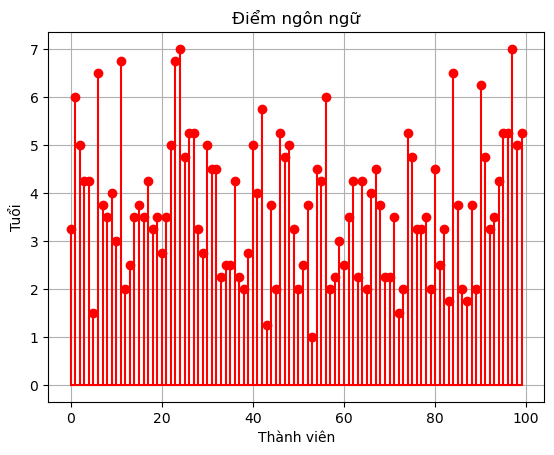

In [2]:
import matplotlib.pyplot as plt

plt.stem(df['NGONNGU'], markerfmt='ro', linefmt='r-', basefmt='r-', use_line_collection=True)
plt.xlabel('Thành viên')
plt.ylabel('Tuổi')
plt.title('Điểm ngôn ngữ')
plt.grid(True)
plt.show()

In [5]:
df.groupby(['GT','KT']).mean()


C:\Users\Admin\AppData\Local\Temp\ipykernel_10224\990919247.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['GT','KT']).mean()


0     7.2
1     5.4
2     5.6
3     6.6
4     6.0
     ... 
95    8.6
96    3.7
97    8.8
98    2.7
99    4.1
Name: T1, Length: 100, dtype: float64

In [3]:
import pandas as pd

# Đường dẫn đến tệp CSV
file_path = 'D:\dulieuxettuyen.csv'

# Đọc tệp CSV vào DataFrame
df = pd.read_csv(file_path)

# Hiển thị một số dòng đầu của DataFrame
df.head() 

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No


In [7]:
# CHƯƠNG TIN CẬY VÀ SAI LẦM 95% và 5%
#đổi tên
df.rename(columns={'TOANLOGICPHANTICH':'LOGIC','GIAIQUYETVANDE':'UNGXU','DINHHUONGNGHENGHIEP':'HUONGNGHIEP'},inplace=True)
df.head()

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,LOGIC,UNGXU,KT,NGAYTHI,HUONGNGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No


In [8]:
#Hãy kiểm tra xem LOGIC thí sinh khối C có bằng 4.0
import scipy.stats as stats
dfKhoiC = df.loc[df['KT'] == 'C']
dfKhoiC['LOGIC']
result=stats.ttest_1samp(dfKhoiC['LOGIC'], popmean=4.0)
# Mặc định mức tin cậy là 95% và mức sai lầm là 5%
print(result)

TtestResult(statistic=0.44599723713991907, pvalue=0.6629370899710998, df=13)


In [5]:
# Sinh viên kiểm tra xem
# điểm trung bình của môn thi UNGXU của khối thi C có bằng 5.0 hay không
import scipy.stats as stats
dfKhoiC = df.loc[df['KT'] == 'C']
dfKhoiC['UNGXU']
stats.ttest_1samp(dfKhoiC['UNGXU'], popmean=5.0)

TtestResult(statistic=-0.7645471693105148, pvalue=0.4581953822944209, df=13)

In [11]:
import scipy.stats as stats
#Hãy kiểm tra xem trung bình điểm thi LOGIC và
# trung bình điểm thi UNGXU của thí sinh thi khối C có bằng nhau không?
dfKhoiC = df.loc[df['KT'] == 'C']
stats.ttest_ind(dfKhoiC['LOGIC'], dfKhoiC['UNGXU'], equal_var=True)

Ttest_indResult(statistic=-1.0329196014245297, pvalue=0.3111543826061086)

In [7]:
from statsmodels.stats.weightstats import ztest as ztest
#Hãy kiểm tra xem trung bình điểm toán học kì 2 lớp 12 có bằng 8.0
ztest(df['T6'], value=8.0)


(-7.797828845339864, 6.298135014120743e-15)

In [8]:
#Hãy kiểm tra xem điểm trung bình toán học kì 1 và học kì 2 năm lớp 12 có bằng nhau không
ztest(df['T5'], df['T6'], value=0)
#=> đủ dữ kiện để nói rằng mức tin cậy 95%

(-1.094138573502891, 0.273894207026412)

In [9]:
# Kiểm định tương quan giữa 2 biến định lượng
# H zero: r = 0
from scipy.stats.stats import pearsonr
# Câu 5: Kiểm tra xem điểm toán học kì 1 và học kì 2 năm lớp 12 có tương quan không?
pearsonr(df['T5'], df['T6'])
#Dương nên tương quan thuận


C:\Users\Admin\AppData\Local\Temp\ipykernel_24176\1717971083.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.7786831657869808, pvalue=1.4846407216274195e-21)

In [10]:
# Sinh viên làm tương tự cho T5 và LOGIC có tương quan hay không ?
pearsonr(df['T5'], df['LOGIC'])
#>0 tương quan thuận, <0 tương quan nghịch
#pvalue > 0.065 > 0.05 chấp nhận

PearsonRResult(statistic=0.18464661226012727, pvalue=0.06590059130545567)

In [11]:
# KIỂM ĐỊNH FISHER TEST
# Mục đích: Kiểm tra sự độc lập của 2 biến định tính dạng nhị phân 2x2
# Ho: Không có sự khác biệt giữa 2 biến định tính
import scipy.stats as stats
#dùng định tính
# Hãy kiểm tra xem có sự phụ thuộc nào giữa việc sinh viên có định hướng nghề nghiệp
# và giới tính khi thí sinh đăng ký dự thi hay không
crosdata = pd.crosstab(df['GT'], [df['HUONGNGHIEP']], rownames=['GT'], colnames=['HUONGNGHIEP'])
crosdata


HUONGNGHIEP,No,Yes
GT,,
F,23,25
M,32,20


In [12]:
#đang
odd_ratio, p_value = stats.fisher_exact(crosdata)
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 0.575
p_value is : 0.22763927303454412


In [13]:
from scipy.stats import chi2_contingency
# Hãy kiểm tra xem có sự phụ thuộc nào giữa khối thi và khu vực khi đăng ký dự thi hay không
crosdata = pd.crosstab(df['KV'], [df['KT']], rownames=['KV'], colnames=['KT'])
crosdata
stat, p, dof, expected = chi2_contingency(crosdata)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.02012461887796485
Dependent (reject H0)


In [14]:
# GT và KT có mối quan hệ hay không?
from scipy.stats import chi2_contingency
# Hãy kiểm tra xem có sự phụ thuộc nào giữa khối thi và khu vực khi đăng ký dự thi hay không
crosdata = pd.crosstab(df['GT'], [df['KT']], rownames=['GT'], colnames=['KT'])
crosdata
stat, p, dof, expected = chi2_contingency(crosdata)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.005044752209452435
Dependent (reject H0)


In [15]:
#khi định tính kết hợp định lượng
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Điểm toán học kì 2 lớp 12 có phụ thuộc vào giới tính không
model = ols('T6 ~ GT', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table
#0.36 => ko có sự phụ thuộc Điểm toán học kì 2 lớp 12 và giới tính

,df,sum_sq,mean_sq,F,PR(>F)
GT,1.0,1.55201,1.55201,0.833769,0.363426
Residual,98.0,182.42109,1.86144,NaN,NaN


In [16]:
# Điểm LOGIC có phụ thuộc vào khu vực hay không
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('LOGIC ~ KV', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
KV,2.0,6.053398,3.026699,2.790934,0.066299
Residual,97.0,105.194102,1.084475,NaN,NaN


In [17]:
# Điểm UNGXU có phụ thuộc khối thi hay không
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('UNGXU ~ KT', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
KT,4.0,3.967636,0.991909,0.911814,0.46041
Residual,95.0,103.344864,1.087841,NaN,NaN


In [18]:
# Hãy cho biết điểm LOGIC có phụ thuộc vào loại GT trên từng nhóm KV hay không
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('LOGIC ~ GT + KV + GT:KV',data=df).fit()
result = sm.stats.anova_lm(model, type=2)
 
# Print the result
print(result)

            df     sum_sq   mean_sq         F    PR(>F)
GT         1.0   3.998401  3.998401  3.853364  0.052602
KV         2.0   8.561314  4.280657  4.125382  0.019173
GT:KV      2.0   1.149707  0.574854  0.554002  0.576510
Residual  94.0  97.538077  1.037639       NaN       NaN


In [19]:
#Phân tích xem NGONNGU có phụ thuộc trên nhóm KV theo từng loại KT hay không
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('NGONNGU ~ KV + KT + KV:KT',data=df).fit()
result = sm.stats.anova_lm(model, type=2)
 
# Print the result
print(result)

            df      sum_sq    mean_sq          F        PR(>F)
KV         2.0    4.237274   2.118637   1.416009  2.482173e-01
KT         4.0   65.431143  16.357786  10.932867  3.150065e-07
KV:KT      8.0    1.486487   0.185811   0.124188  9.981082e-01
Residual  87.0  130.169640   1.496203        NaN           NaN


In [3]:
#Phân tích hồi quy
#Phân tích sự ảnh hưởng T5 lên T6
import statsmodels.api as sm


#adding a constant
X_with_constant = sm.add_constant(df[["T5"]].values)


y = df[['T6']].values


#performing the regression
result = sm.OLS(y, X_with_constant).fit()


# Result of statsmodels
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     151.0
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           1.48e-21
Time:                        16:26:44   Log-Likelihood:                -125.76
No. Observations:                 100   AIC:                             255.5
Df Residuals:                      98   BIC:                             260.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1130      0.402      5.257      0.0

In [21]:
#Sinh viên tự khám phá sự ảnh hưởng của T6 đến điểm thi LOGIC
#Hỏi nếu T6 = 6.0 thì dự báo đi thi LOGIC được bao nhiêu
import statsmodels.api as sm


#adding a constant
X_with_constant = sm.add_constant(df[["T6"]].values)


y = df[['LOGIC']].values


#performing the regression
result = sm.OLS(y, X_with_constant).fit()


# Result of statsmodels
print(result.summary())
#=>

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     9.798
Date:                Fri, 08 Sep 2023   Prob (F-statistic):            0.00230
Time:                        20:16:40   Log-Likelihood:                -142.46
No. Observations:                 100   AIC:                             288.9
Df Residuals:                      98   BIC:                             294.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6287      0.529      4.965      0.0

In [22]:
# Hãy phân tích sự ảnh hưởng của điểm toán học kì 1,2 năm lớp 12 đến điểm LOGIC
import statsmodels.api as sm


#adding a constant
X_with_constant = sm.add_constant(df[['T5','T6']].values)


y = df[['LOGIC']].values


#performing the regression
result = sm.OLS(y, X_with_constant).fit()


# Result of statsmodels
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     5.226
Date:                Fri, 08 Sep 2023   Prob (F-statistic):            0.00699
Time:                        20:26:05   Log-Likelihood:                -142.11
No. Observations:                 100   AIC:                             290.2
Df Residuals:                      97   BIC:                             298.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7072      0.539      5.026      0.0

ValueError: '[25, 30, 35, 40, 45, 50, 55, 60, 65, 70]' is not one of the example datasets.